In [63]:
from torchvision import transforms
import torch
import numpy as np
from PIL import Image

In [85]:
class RandomMask(object):
    def __init__(self, S=4, p=0.5):
        self.S = S
        self.p = p
    
    def __call__(self, img):
        c, h, w = img.shape
        split_w = w // self.S
        split_h = h // self.S
        mask = np.random.rand(self.S, self.S) > self.p
        mask = np.repeat(np.repeat(mask, split_w, axis=1), split_h, axis=0)
        h_left = h - mask.shape[0]
        w_left = w - mask.shape[1]
        mask = np.pad(mask, ((0, h_left), (0, w_left)), mode='edge').astype(float)
        assert mask.shape == img.shape[1:], (mask.shape, img.size)
        mask = torch.from_numpy(mask).float()
        return img * mask

In [86]:
t = RandomMask()

In [90]:
tran = transforms.Compose([transforms.RandomCrop((224, 224)), 
                           transforms.ToTensor(), 
                           transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
                           RandomMask()])

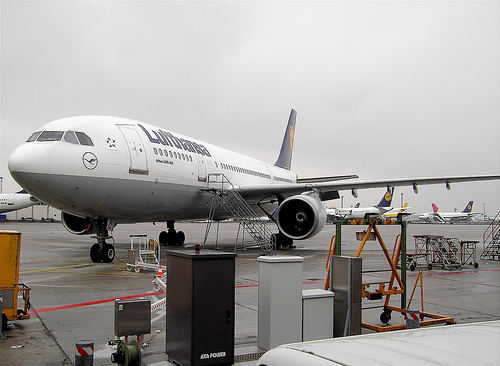

In [91]:
img = Image.open('/home/stevetod/jzy/dataset/PascalVOC/JPEGImages/2007_000033.jpg')
img

In [96]:
t = tran(img)

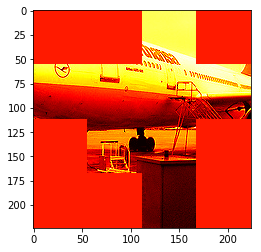

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(t[2], cmap='hot')

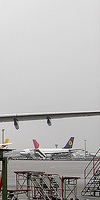

In [74]:
transforms.RandomCrop((200, 100))(img)